# Empresa de viajes Zuber

En esta investigación se realizará un análisis a distintos datsets de la empresa de viajes Zuber, los cuales fueron recuperados y ordenados en SQL, estas tabas fueron de las condiciones climáticas, los id de los barrios, los viajes y los datos de los vehículos; de la ciudad de Chicago para estudiar los datos copilados en el 2017, con el fin de encontrar patrones en la información y conocer las preferencias de los pasajeros y el impacto de factores externos en sus viajes.


Por este motivo, se buscará lo siguiente:


1. Abrir los archivos de datos y analizar la información general.
2. Preprocesar los datos.
3. Realizar un análisis de datos.
4. Probar las hipótesis.
5. Escribir una conclusión general

## Análisis exploratorio de datos

### Inicialización

In [1]:
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import pandas as pd

In [2]:
company_data = pd.read_csv('/datasets/project_sql_result_01.csv')
company_data

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [3]:
neighborhood_data = pd.read_csv('/datasets/project_sql_result_04.csv')
neighborhood_data

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [4]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
neighborhood_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
top_neighborhoods = neighborhood_data.groupby('dropoff_location_name')['average_trips'].mean().sort_values(ascending=False).head(10)
top_neighborhoods

dropoff_location_name
Loop                  10727.466667
River North            9523.666667
Streeterville          6664.666667
West Loop              5163.666667
O'Hare                 2546.900000
Lake View              2420.966667
Grant Park             2068.533333
Museum Campus          1510.000000
Gold Coast             1364.233333
Sheffield & DePaul     1259.766667
Name: average_trips, dtype: float64

In [7]:
top_companies = company_data.groupby('company_name')['trips_amount'].sum().sort_values(ascending=False).head(10)
top_companies

company_name
Flash Cab                            19558
Taxi Affiliation Services            11422
Medallion Leasing                    10367
Yellow Cab                            9888
Taxi Affiliation Service Yellow       9299
Chicago Carriage Cab Corp             9181
City Service                          8448
Sun Taxi                              7701
Star North Management LLC             7455
Blue Ribbon Taxi Association Inc.     5953
Name: trips_amount, dtype: int64

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Aqui correcto!

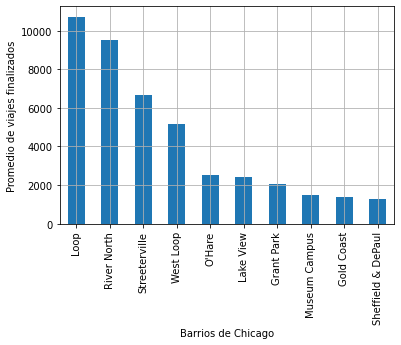

In [8]:
top_neighborhoods.plot(kind='bar', grid=True)
plt.xlabel('Barrios de Chicago')
plt.ylabel('Promedio de viajes finalizados')
plt.show()

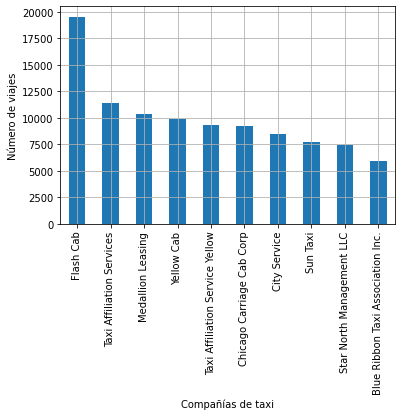

In [9]:
top_companies.plot(kind='bar', grid=True)
plt.xlabel('Compañías de taxi')
plt.ylabel('Número de viajes')
plt.show()

### Conclusión intermedia

Después de elaborar y analizar los gráficos para los barrios de Chicago y las compañías de taxis; se pudo concluir que con respecto a los barrios, los barrios de chicago donde más se finalizan los viajes en promedio son Loop; siendo este el primero; River North, Streeterville, West Loop; estos 4 barrios presentan una diferencia notoria en relación a los otros 6 barrios de los 10 principales en noviembre del 2017.

Con respecto a las compañías de taxis, la compañía que más viajes tuvo entre el 15 y 16 de noviembre, es la compañía Flash Cab, teniendo una gran diferencia en relación a las otras compañías, siendo de más de 8000 viajes la diferencia.

## Prueba de hipótesis

En esta parte del proyecto, se buscará probar las siguientes hipótesis:

-La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos; el cual es el valor del campo weather_conditions 'bad'.

Esto se realizará a través de un criterio de verificación de hipótesis.

In [10]:
trips_loop_data = pd.read_csv('/datasets/project_sql_result_07.csv')
trips_loop_data

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [11]:
trips_loop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [12]:
trips_loop_data['start_ts'] = pd.to_datetime(trips_loop_data['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [13]:
trips_loop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [14]:
trips_loop_data['weekday'] =trips_loop_data['start_ts'].dt.weekday
trips_loop_data

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5
1066,2017-11-11 08:00:00,Good,1380.0,5


In [16]:
trips_loop_data.groupby('weather_conditions')['duration_seconds'].mean()

weather_conditions
Bad     2427.205556
Good    1999.675676
Name: duration_seconds, dtype: float64

In [18]:
trips_loop_data.groupby('weather_conditions')['weather_conditions'].count()

weather_conditions
Bad     180
Good    888
Name: weather_conditions, dtype: int64

Antes de realizar la verificación de hipótesis, se pudo observar que en este dataset el tipo de una columna no coincidía, la cual era la columna start_ts o la fecha y hora. Por este motivo, se decidió cambiarla al tipo datetime, con el fin de obtener los días de la semana, y comprobar que todos los días de este datset sean los sábados, lo que sí se pudo confirmar.

### Verificación de hipótesis

H.N = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.

H.A = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

In [15]:
Loops_rainy_data = trips_loop_data.query('weather_conditions == "Bad"')
loops_good_data =  trips_loop_data.query('weather_conditions == "Good"')
rainy = Loops_rainy_data['duration_seconds']
good = loops_good_data['duration_seconds']
alpha = 0.05
results = st.ttest_ind(rainy, good)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 6.517970327099473e-12
Rechazamos la hipótesis nula


Para poder verificar las hipótesis en ambos casos, se decidió realizar la prueba de hipótesis sobre la igualdad de dos medias de dos poblaciones, ya que se estaban utilizan dos datasets de dos poblaciones estadísticas diferentes, estableciendo un valor de significancia(alpha) del 5%; aunque todo provenga de uno mismo pero más grande, para comparar en este caso los ingresos promedios. Resultando en ambos casos, que se rechace la hipótesis nula, es decir, que la duración promedio de los viajes desde el Loop hasta el aeropuerto O'Hare cambia los sábados lluviosos.

## Conclusión general

Después de analizar los datasets se pudo concluir lo siguiente:


1. Primero, se recuperó la información de los datasets trabajados en este proYecto, a través de SQL, para después importarlos a esta plataforma.
2. se decidió analizar la información de los datset, la cantidad de columnas, las filas, la cantidad de datos, los tipos de columnas, etc.
3. No se encontraron valores ausentes.
3. No se encontraron datos duplicados.
4. Se tuvo que añadir una nueva columna 'week_day' para el datset de las fechas y las condiciones climáticas de los viajes, para observar si el día con el que se estaba trabajando era el correcto.

Asimismo, se comprobó lo siguiente:

1. La duración promedio de los viajes desde el barrio Loop hasta el aeropuerto internacional O'Hare cambia los días sábados lluviosos, es decir, cuando el clima esta bueno, la duración de los viajes promedio es menor que cuando el clima esta lluvioso.
2. La compañía de taxis con más números de viajes entre el 15 y 16 de noviembre es Flash Cab con más de 19000 viajes, teniendo una diferencia de más de 8000 viajes en comparación a las otras compañías.
3. El Barrio de Chicago donde mas finalizaron los viajes en promedio en noviembre del 2017, es el barrio Loop con alrededor de 10700 viajes en promedio.
4. Por último, se pudo concluir que a los pasajeros prefieren viajar cuando el clima esta bien, es decir, sin lluvias ni tormentas, con el fin de viajar más rápido. Asimismo, tienen una preferencia notoria por una compañía de viajes, esto se puede apreciar por el número de viajes que realizan con aquella compañía.

Después de analizar los datos, se puede concluir que para para los pasajeros el clima y la compañía son factores importantes para poder viajar a cualquier locación.